In [96]:
import numpy as np
import cv2

In [97]:
img_to_detect=cv2.imread('/content/scene2.jpg')
img_weight=img_to_detect.shape[1]

In [98]:
img_blob=cv2.dnn.blobFromImage(img_to_detect,0.003922,(416,416),swapRB=True,crop=False)

In [99]:
class_labels = ["person","bicycle","motorcycle","airplane","bus","train","truck","boot","trofficlight","firehydrant","stopsign","parkingeeter","bench","bird", "cat", "dog","horse", "sheep","cow", "elephant", "zebra", "giraffe","bockpack", "umbrella", "handbag", "tie","suitcase", "frisbee","skis", "sportsbalt", "kite", "baseballbat", "basebal bglave","skateboard", "surfboard","tennisracket" "bottle","wineglass","cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich","orange", "broccoli", "carrot", "hotdog", "pizzo","donut", "cabe","chair", "sofa", "pottedplant", "bed", "diningtable", "toilet","tvmonitor", "Laptop","mouse", "remote", "keyboard","cellphone", "microwave", "oven", "toaster", "sink","refrigeratar", "book", "clock","vase","scissors","teddybear","hairdrier", "toothbrush"]


In [100]:
class_colours=["0,255,0","0,0,2555","255,0,0","255,255,0","0,2555,2555"]
class_colours=[np.array(every_color.split(",")).astype("int") for every_color in class_colour]
class_colours=np.array(class_colour)
class_colours=np.tile(class_colours,(16,1))

In [101]:
yolo_model=cv2.dnn.readNetFromDarknet('/content/yolov3.cfg.txt','/content/yolov3.weights')

In [102]:
yolo_layers=yolo_model.getLayerNames()

In [103]:
yolo_output_layer = [yolo_layers[yolo_layer[0] - 1] for yolo_layer in yolo_model.getUnconnectedOutLayers()]

In [104]:
yolo_model.setInput(img_blob)

In [105]:
obj_detection_layers=yolo_model.forward(yolo_output_layer)

In [106]:
for obj_detection_layer in obj_detection_layers:
  for obj_detection in obj_detection_layer:
    all_scores=obj_detection[5:]
    predicted_class_id=np.argmax(all_scores)
    prediction_confidence=all_scores[predicted_class_id]


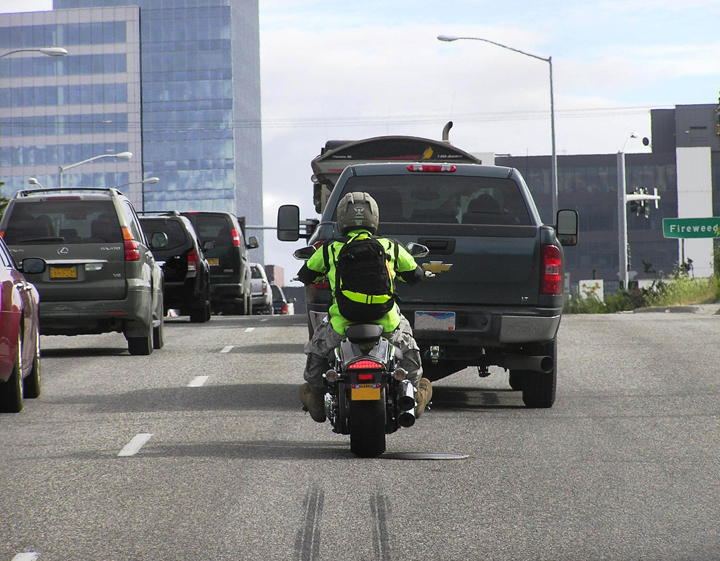

In [109]:
if prediction_confidence > 0.20:
            #get the predicted label
            predicted_class_label = class_labels[predicted_class_id]
            #obtain the bounding box co-oridnates for actual image from resized image size
            bounding_box = object_detection[0:4] * np.array([img_width, img_height, img_width, img_height])
            (box_center_x_pt, box_center_y_pt, box_width, box_height) = bounding_box.astype("int")
            start_x_pt = int(box_center_x_pt - (box_width / 2))
            start_y_pt = int(box_center_y_pt - (box_height / 2))
            end_x_pt = start_x_pt + box_width
            end_y_pt = start_y_pt + box_height
            
            #get a random mask color from the numpy array of colors
            box_color = class_colors[predicted_class_id]
            
            #convert the color numpy array as a list and apply to text and box
            box_color = [int(c) for c in box_color]
            
            # print the prediction in console
            predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
            print("predicted object {}".format(predicted_class_label))
            
            # draw rectangle and text in the image
            cv2.rectangle(img_to_detect, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 1)
            cv2.putText(img_to_detect, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)

cv2_imshow("Detection Output", img_to_detect)